In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Part I: Mutual information

In [20]:
def Mutual(S):
    mutual_inf = 0
    X = S[0]
    Y = S[1]
    Sigma = np.cov([X,Y],rowvar=1) #covariance matrix\n
    mutual_inf = -0.5 * np.log(1-(Sigma[0][1]**2)/(Sigma[0][0]*Sigma[1][1]))
    return(mutual_inf)


In [21]:
actual = -0.5 * np.log(1-(0.3**2)/(1*2))
actual

0.023021969250703423

In [22]:
n = np.arange(10**3, 10**5, 500)
mean = [0,0]
cov = [[1, 0.3],[0.3, 2]]


In [23]:
err = np.zeros(len(n))
for i in range(len(n)):
    x, y = np.random.multivariate_normal(mean, cov, n[i]).T
    S = [x,y]
    err[i] = abs(Mutual(S) - actual)


(1000.0, 100000.0)

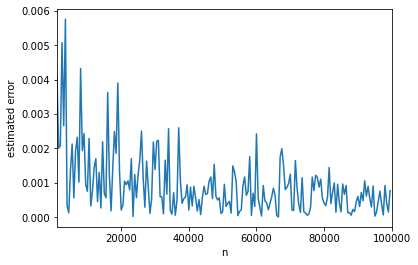

In [24]:
plt.plot(n, err, '-')
plt.ylabel('estimated error')
plt.xlabel('n')
plt.xlim([10**3, 10**5])

## Part II : Chow-Liu Algorithm

In [25]:
#Chow-Liu using Prim's algorithm
def ChowLiu(W):
    V = len(W) 
    selected = [0]*V 
    no_edge = 0 
    selected[0] = True
    adj_matrix = np.zeros((V, V))
    while (no_edge < V-1):
        maximum = -99
        x = 0
        y = 0
        for i in range(V):
            if selected[i]:
                for j in range(V):
                    if ((not selected[j]) and W[i][j]):  
                        if maximum < W[i][j]:
                            maximum = W[i][j]
                            x = i
                            y = j
        adj_matrix[x][y] = 1
        adj_matrix[y][x] = 1
        selected[y] = True
        no_edge += 1
    print(adj_matrix)
        


In [26]:
G = [[0, 9, 75, 0, 0],
     [9, 0, 95, 19, 42],
     [75, 95, 0, 51, 66],
     [0, 19, 51, 0, 31],
     [0, 42, 66, 31, 0]]
ChowLiu(G)


[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [27]:
W = [[0,1,2,0],[1,0,4,3],[2,4,0,0],[0,3,0,0]]
ChowLiu(W)

[[0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]
